# Energy Dataset

## Importing Dataset

Importing the dataset from the Github repository of the project

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = 'https://github.com/up841068/energy-economic-growth/raw/main/raw_data/renewable-energy-data-scrapping.csv'

df_energy = pd.read_csv(url)

In [3]:
df_energy.tail(3)

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
21887,Zimbabwe,2019,ZWE,15354606.0,NaN,NaN,NaN,NaN,NaN,24.748,...,0.364,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21888,Zimbabwe,2020,ZWE,15669663.0,NaN,NaN,NaN,NaN,NaN,22.336,...,0.395,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21889,Zimbabwe,2021,ZWE,15993525.0,NaN,NaN,NaN,NaN,NaN,23.760,...,0.498,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN


## Filtering the rows and columns

Selecting the columns that contain information about renewable energy production 

In [4]:
columns_to_keep = ['country', 'year', 'iso_code', 'net_elec_imports', 'per_capita_electricity','biofuel_elec_per_capita','hydro_elec_per_capita',
                   'solar_elec_per_capita','wind_elec_per_capita']
columns_to_drop = list(set(df_energy.columns) - set(columns_to_keep))
df_energy_filtered1 = df_energy.drop(columns=columns_to_drop)

In [5]:
df_energy_filtered1.head(3)

,country,year,iso_code,biofuel_elec_per_capita,hydro_elec_per_capita,net_elec_imports,per_capita_electricity,solar_elec_per_capita,wind_elec_per_capita
0,Afghanistan,1900,AFG,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,AFG,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,AFG,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning rows from years previous to 2000

In [6]:
df_energy_filtered2 = df_energy_filtered1[df_energy_filtered1.year > 1999].reset_index()

In [7]:
df_energy_filtered2.shape

(6457, 10)

## Cleaning rows related to regions (not countries)

Removing the data points related to regions, as we intend to do the analysis on countries

In [8]:
# All countries have a respective 'iso_code', so we will remove the ones that do note have one
df_energy_filtered_countries_only = df_energy_filtered2.dropna(subset=['iso_code'])

In [9]:
df_energy_filtered_countries_only.shape

(4814, 10)

## Creating column with total production of energy

We are not using this at first!!! (This was supposed to be used if we had a lot of zeros/NaNs using the sources sepparated)

In [10]:
# df_energy_filtered_countries_only.loc[:, 'total_renewable_electricity'] = df_energy_filtered_countries_only[['biofuel_electricity', 'hydro_electricity', 'other_renewable_exc_biofuel_electricity', 'solar_electricity', 'wind_electricity']].sum(axis=1)

In [11]:
# df_energy_filtered_countries_only.head()

In [12]:
# count_sum_equals_zero = (df_energy_filtered_countries_only.total_renewable_electricity == 0).sum()/len(df_energy_filtered)
# count_sum_equals_zero

## Analyzing missing values

How many NaNs we have for each feature?

In [13]:
df_energy_filtered_countries_only.isnull().sum()/len(df_energy_filtered_countries_only)

index                      0.000000
country                    0.000000
year                       0.000000
iso_code                   0.000000
biofuel_elec_per_capita    0.047570
hydro_elec_per_capita      0.029290
net_elec_imports           0.020980
per_capita_electricity     0.020773
solar_elec_per_capita      0.027005
wind_elec_per_capita       0.029082
dtype: float64

In [14]:
## creates a dictionary with all features and the respective amount of Zeros for each
# countries = df_energy_filtered.country.unique()
# missing_values_dict = {}
# for country in countries:
#     percentage_missing_values = ((df_energy_filtered.country == country) & (df_energy_filtered.total_renewable_electricity == 0)).sum()\
#     /len(df_energy_filtered[df_energy_filtered.country == country])
#     missing_values_dict[country] = percentage_missing_values
# missing_values_dict

# Economic Growth Dataset

## Importing Dataset

Importing the dataset from the Github repository of the project

In [15]:
url = 'https://github.com/up841068/energy-economic-growth/raw/main/raw_data/World_Development_Indicators.xlsx'

df_gdp = pd.read_excel(url)

In [16]:
df_gdp.head(3)

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],...,1969 [YR1969],1968 [YR1968],1967 [YR1967],1966 [YR1966],1965 [YR1965],1964 [YR1964],1963 [YR1963],1962 [YR1962],1961 [YR1961],1960 [YR1960]
0,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,Brazil,BRA,6086.08487,6745.865881,9216.14336,9183.470768,8783.225984,8426.853352,...,3304.860245,3095.225632,2892.687723,2850.904774,2746.261344,2758.866607,2746.517052,2811.630814,2717.004894,2578.432125
1,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,Afghanistan,AFG,..,..,608.386715,602.516979,592.476537,590.427739,...,..,..,..,..,..,..,..,..,..,..
2,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,Albania,ALB,1606.296047,1960.881946,3780.698202,3855.759734,3952.802538,4090.371657,...,..,..,..,..,..,..,..,..,..,..


## Filtering the rows and columns

In [17]:
df_gdp_filtered = df_gdp.drop(columns=['Series Name', 'Series Code'])

In [18]:
df_gdp_filtered.shape

(266, 65)

## Flattening the years to be in one column (instead of one column per year)

Moving the year columns to become lines respective to their country.<br>
We will use this to merge with the Energy dataset

In [19]:
df_gdp_filtered_flattened = pd.melt(df_gdp_filtered, id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='GDP_per_capita')

In [20]:
df_gdp_filtered_flattened.head(3)

,Country Name,Country Code,Year,GDP_per_capita
0,Brazil,BRA,1990 [YR1990],6086.08487
1,Afghanistan,AFG,1990 [YR1990],..
2,Albania,ALB,1990 [YR1990],1606.296047


## Turning 'Year' column into an int

Removing the brackets string in the Year column and turning it into an integer

In [21]:
df_gdp_filtered_flattened['Year'] = df_gdp_filtered_flattened['Year'].str.extract(r'(\d{4})').astype(int)

In [22]:
df_gdp_filtered_flattened.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16758 entries, 0 to 16757
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    16758 non-null  object
 1   Country Code    16758 non-null  object
 2   Year            16758 non-null  int64 
 3   GDP_per_capita  16758 non-null  object
dtypes: int64(1), object(3)
memory usage: 523.8+ KB


Renaming the columns so they match the ones in the Energy dataset, easing the merge

In [23]:
df_gdp_filtered_flattened.rename(columns={"Year": "year", "Country Code": "iso_code"}, inplace=True)

# Merging the features and target datasets

In [24]:
full_df = pd.merge(df_energy_filtered_countries_only, df_gdp_filtered_flattened, on=['year', 'iso_code'], how='left')

In [25]:
full_df.drop(columns=['index', 'Country Name'], inplace=True)

In [26]:
full_df.sample(8)

,country,year,iso_code,biofuel_elec_per_capita,hydro_elec_per_capita,net_elec_imports,per_capita_electricity,solar_elec_per_capita,wind_elec_per_capita,GDP_per_capita
787,Cape Verde,2017,CPV,0.000,0.000,0.00,814.218,17.700,123.903,3068.990292
4637,Uruguay,2021,URY,469.899,1538.118,-1.08,4617.272,140.094,1456.396,15874.737995
1826,Guam,2016,GUM,0.000,0.000,0.00,10275.478,415.771,0.000,34509.600645
4620,Uruguay,2004,URY,12.071,1427.363,2.25,1744.219,0.000,0.000,9486.440619
2682,Malta,2008,MLT,0.000,0.000,0.00,5587.713,0.000,0.000,19948.056257
2435,Lesotho,2005,LSO,0.000,232.625,-0.01,232.625,0.000,0.000,843.508131
2545,Macao,2003,MAC,0.000,0.000,0.18,3502.415,0.000,0.000,36992.459358
2767,Mexico,2004,MEX,63.783,240.029,-1.27,2122.067,0.096,0.192,8849.510636


# Treating the raw dataset

## Removing the countries with 'NaN's in 'GDP_per_capita' (target)

In [27]:
# The countries we remove here do not affect our model
regions_to_remove = full_df['country'][full_df.GDP_per_capita.isna()].unique()
regions_to_remove

array(['Antarctica', 'Cook Islands', 'Falkland Islands', 'French Guiana',
       'Guadeloupe', 'Martinique', 'Montserrat', 'Netherlands Antilles',
       'Niue', 'Reunion', 'Saint Helena', 'Saint Pierre and Miquelon',
       'Taiwan', 'Western Sahara'], dtype=object)

In [28]:
full_df_gdpclean1 = full_df.dropna(subset=['GDP_per_capita']).reset_index(drop=True)
full_df_gdpclean1

,country,year,iso_code,biofuel_elec_per_capita,hydro_elec_per_capita,net_elec_imports,per_capita_electricity,solar_elec_per_capita,wind_elec_per_capita,GDP_per_capita
0,Afghanistan,2000,AFG,0.000,15.862,0.10,24.050,0.000,0.0,..
1,Afghanistan,2001,AFG,0.000,25.395,0.10,29.967,0.000,0.0,..
2,Afghanistan,2002,AFG,0.000,26.666,0.10,32.857,0.000,0.0,359.766343
3,Afghanistan,2003,AFG,0.000,27.821,0.10,41.510,0.000,0.0,363.101481
4,Afghanistan,2004,AFG,0.000,23.776,0.10,37.786,0.000,0.0,354.033913
...,...,...,...,...,...,...,...,...,...,...
4505,Zimbabwe,2017,ZWE,21.693,269.132,2.22,498.268,0.678,0.0,1421.24077
4506,Zimbabwe,2018,ZWE,25.910,335.499,1.02,610.542,1.329,0.0,1462.59028
4507,Zimbabwe,2019,ZWE,24.748,271.580,1.11,536.647,1.954,0.0,1342.989587
4508,Zimbabwe,2020,ZWE,22.336,243.145,1.98,485.014,1.915,0.0,1213.117058


## Removing the countries with missing data in 'GDP_per_capita' (target)

Removing the countries that have more than 9 missing data in gdp

In [29]:
total_countries = full_df_gdpclean1['country'].unique()
no_gdp_countries = []

for i in total_countries:
    if full_df_gdpclean1['GDP_per_capita'][(full_df_gdpclean1.GDP_per_capita == '..') & (full_df_gdpclean1.country == i)].count() > 9:
        no_gdp_countries.append(i)

no_gdp_countries

['British Virgin Islands',
 'Djibouti',
 'Eritrea',
 'Faroe Islands',
 'Gibraltar',
 'New Caledonia',
 'North Korea',
 'Somalia',
 'Turks and Caicos Islands',
 'Venezuela']

In [30]:
full_df_gdpclean2 = full_df_gdpclean1[~full_df_gdpclean1['country'].isin(no_gdp_countries)].reset_index(drop=True)
full_df_gdpclean2

,country,year,iso_code,biofuel_elec_per_capita,hydro_elec_per_capita,net_elec_imports,per_capita_electricity,solar_elec_per_capita,wind_elec_per_capita,GDP_per_capita
0,Afghanistan,2000,AFG,0.000,15.862,0.10,24.050,0.000,0.0,..
1,Afghanistan,2001,AFG,0.000,25.395,0.10,29.967,0.000,0.0,..
2,Afghanistan,2002,AFG,0.000,26.666,0.10,32.857,0.000,0.0,359.766343
3,Afghanistan,2003,AFG,0.000,27.821,0.10,41.510,0.000,0.0,363.101481
4,Afghanistan,2004,AFG,0.000,23.776,0.10,37.786,0.000,0.0,354.033913
...,...,...,...,...,...,...,...,...,...,...
4285,Zimbabwe,2017,ZWE,21.693,269.132,2.22,498.268,0.678,0.0,1421.24077
4286,Zimbabwe,2018,ZWE,25.910,335.499,1.02,610.542,1.329,0.0,1462.59028
4287,Zimbabwe,2019,ZWE,24.748,271.580,1.11,536.647,1.954,0.0,1342.989587
4288,Zimbabwe,2020,ZWE,22.336,243.145,1.98,485.014,1.915,0.0,1213.117058


## Input value in missing data in target column

Inputing in the countries that have less than 10 missing data in gdp

In [31]:
# All the indexes of rows that have missing data
nan_target_indexes = full_df_gdpclean2[full_df_gdpclean2['GDP_per_capita'] == '..'].index
nan_target_indexes

Index([   0,    1,   65,   66,  241,  396,  617,  750,  751,  752,  753,  754,
        755,  992, 1037, 1060, 1105, 1279, 1368, 1391, 1502, 1547, 1569, 1592,
       1593, 1790, 1923, 1968, 2122, 2189, 2300, 2323, 2478, 2714, 2715, 2716,
       2717, 2780, 2891, 2892, 3131, 3154, 3221, 3354, 3530, 3553, 3624, 3625,
       3626, 3627, 3628, 3629, 3652, 3741, 3785, 3982, 3983, 4114, 4115, 4135,
       4243, 4244, 4245],
      dtype='int64')

In [32]:
# Getting the parameters for calculating the average GDP to be inputed (MANUAL CALCULATION FOR THE 'get_parameters_input_gdp_mean' FUNCTION

# index = item.index[0]
# country = item.loc[index, 'country'] # Country of the input row
# year = item.loc[index, 'year'] # Year of the input row
# years = np.arange(year-5, year+6, 1) # Range of years used to calculate the mean
# years = np.delete(years, np.where(years == year))
# index, country, year, years

In [33]:
# Function for getting the parameters for calculating the average GDP to be inputed

def get_parameters_input_gdp_mean(nan_index):
    country = full_df_gdpclean2.loc[nan_index, 'country'] # Country of the input row
    year = full_df_gdpclean2.loc[nan_index, 'year'] # Year of the input row
    years = np.arange(year-6, year+7, 1) # Range of years used to calculate the mean
    years = np.delete(years, np.where(years == year))
    # index, country, year, years
    return country, years

In [34]:
# Function for calculating the mean value to be inputed

def calculate_input_gdp_mean(country, years):
    gdp_values = []
    for i in years:
        gdp = full_df_gdpclean2.loc[(full_df_gdpclean2['country'] == country) & (full_df_gdpclean2['year'] == i), 'GDP_per_capita']
        if not gdp.empty:
            gdp_value = pd.to_numeric(gdp.item(), errors='coerce')
            if type(gdp_value) == float:
                gdp_values.append(gdp_value)
                # print(gdp_values)
    
    input_gdp_mean = np.mean(gdp_values)
    # print(gdp_input)
    return input_gdp_mean

In [35]:
# Interating over the rows that have missing values in the target and inputing the calculated meand from +/- 6 years
for nan_target_indexe in nan_target_indexes:
    country, years = get_parameters_input_gdp_mean(nan_target_indexe)
    input_gdp_mean = calculate_input_gdp_mean(country, years)
    print(f'Inputed {round(input_gdp_mean)} GDP mean for {country} in {years[5] + 1}')
    full_df_gdpclean2.at[nan_target_indexe, 'GDP_per_capita'] = input_gdp_mean

Inputed 368 GDP mean for Afghanistan in 2000
Inputed 378 GDP mean for Afghanistan in 2001
Inputed 12943 GDP mean for American Samoa in 2000
Inputed 12958 GDP mean for American Samoa in 2001
Inputed 45228 GDP mean for Austria in 2022
Inputed 42023 GDP mean for Belgium in 2022
Inputed 7938 GDP mean for Bulgaria in 2022
Inputed 96180 GDP mean for Cayman Islands in 2000
Inputed 96232 GDP mean for Cayman Islands in 2001
Inputed 95211 GDP mean for Cayman Islands in 2002
Inputed 92416 GDP mean for Cayman Islands in 2003
Inputed 89837 GDP mean for Cayman Islands in 2004
Inputed 87930 GDP mean for Cayman Islands in 2005
Inputed 13533 GDP mean for Croatia in 2022
Inputed 26960 GDP mean for Cyprus in 2022
Inputed 19402 GDP mean for Czechia in 2022
Inputed 56386 GDP mean for Denmark in 2022
Inputed 19769 GDP mean for Estonia in 2022
Inputed 45361 GDP mean for Finland in 2022
Inputed 37583 GDP mean for France in 2022
Inputed 42485 GDP mean for Germany in 2022
Inputed 18382 GDP mean for Greece in 20

In [36]:
# Check if there are no more missing values in the target
check_nan_target_indexes = full_df_gdpclean2[full_df_gdpclean2['GDP_per_capita'] == '..'].index
if check_nan_target_indexes.empty == True:
    print('Inputing succeded!')
else:
    print('not succeded')

Inputing succeded!


In [37]:
full_df_gdpclean2

,country,year,iso_code,biofuel_elec_per_capita,hydro_elec_per_capita,net_elec_imports,per_capita_electricity,solar_elec_per_capita,wind_elec_per_capita,GDP_per_capita
0,Afghanistan,2000,AFG,0.000,15.862,0.10,24.050,0.000,0.0,368.187174
1,Afghanistan,2001,AFG,0.000,25.395,0.10,29.967,0.000,0.0,378.391401
2,Afghanistan,2002,AFG,0.000,26.666,0.10,32.857,0.000,0.0,359.766343
3,Afghanistan,2003,AFG,0.000,27.821,0.10,41.510,0.000,0.0,363.101481
4,Afghanistan,2004,AFG,0.000,23.776,0.10,37.786,0.000,0.0,354.033913
...,...,...,...,...,...,...,...,...,...,...
4285,Zimbabwe,2017,ZWE,21.693,269.132,2.22,498.268,0.678,0.0,1421.24077
4286,Zimbabwe,2018,ZWE,25.910,335.499,1.02,610.542,1.329,0.0,1462.59028
4287,Zimbabwe,2019,ZWE,24.748,271.580,1.11,536.647,1.954,0.0,1342.989587
4288,Zimbabwe,2020,ZWE,22.336,243.145,1.98,485.014,1.915,0.0,1213.117058


At this point, we have the full dataset with with all target values filled

## Treating 'NaN's from the features

In [38]:
# Checking countries that have more than 20 NaN values in its features (>25%)

#columns = ['biofuel_electricity', 'hydro_electricity', 'solar_electricity', 'wind_electricity',
   #        'coal_electricity', 'fossil_electricity', 'gas_production', 'greenhouse_gas_emissions',
   #        'low_carbon_electricity', 'net_elec_imports', 'nuclear_electricity', 'oil_production',
   #        'primary_energy_consumption','hydro_consumption','per_capita_electricity','biofuel_elec_per_capita',
   #        'hydro_elec_per_capita','solar_elec_per_capita','wind_elec_per_capita']

columns = ['net_elec_imports','per_capita_electricity','biofuel_elec_per_capita','hydro_elec_per_capita', 'solar_elec_per_capita','wind_elec_per_capita']
total_countries = full_df_gdpclean2['country'].unique()
no_energy_countries = []

for i in total_countries:
    mask = full_df_gdpclean2['country'] == i
    nan_sum = full_df_gdpclean2.loc[mask, columns].isna().sum().sum()
    if nan_sum > 20:
        no_energy_countries.append(i)
print(no_energy_countries)

['Bermuda', 'Chile', 'Micronesia (country)', 'Northern Mariana Islands', 'Tuvalu']


In [39]:
# Dropping countries that have more than 20 NaN values in its features (>25%)
full_df_gdp_feat_clean = full_df_gdpclean2[~full_df_gdpclean2['country'].isin(no_energy_countries)].reset_index(drop=True)
full_df_gdp_feat_clean

,country,year,iso_code,biofuel_elec_per_capita,hydro_elec_per_capita,net_elec_imports,per_capita_electricity,solar_elec_per_capita,wind_elec_per_capita,GDP_per_capita
0,Afghanistan,2000,AFG,0.000,15.862,0.10,24.050,0.000,0.0,368.187174
1,Afghanistan,2001,AFG,0.000,25.395,0.10,29.967,0.000,0.0,378.391401
2,Afghanistan,2002,AFG,0.000,26.666,0.10,32.857,0.000,0.0,359.766343
3,Afghanistan,2003,AFG,0.000,27.821,0.10,41.510,0.000,0.0,363.101481
4,Afghanistan,2004,AFG,0.000,23.776,0.10,37.786,0.000,0.0,354.033913
...,...,...,...,...,...,...,...,...,...,...
4181,Zimbabwe,2017,ZWE,21.693,269.132,2.22,498.268,0.678,0.0,1421.24077
4182,Zimbabwe,2018,ZWE,25.910,335.499,1.02,610.542,1.329,0.0,1462.59028
4183,Zimbabwe,2019,ZWE,24.748,271.580,1.11,536.647,1.954,0.0,1342.989587
4184,Zimbabwe,2020,ZWE,22.336,243.145,1.98,485.014,1.915,0.0,1213.117058


In [40]:
full_df_gdp_feat_clean.isnull().sum()

country                    0
year                       0
iso_code                   0
biofuel_elec_per_capita    1
hydro_elec_per_capita      1
net_elec_imports           1
per_capita_electricity     0
solar_elec_per_capita      0
wind_elec_per_capita       0
GDP_per_capita             0
dtype: int64

In [41]:
# Filling remaining NaN values that were supposed to be zero (values from 2021 with all historical values equals to zero)
# full_df_gdp_feat_clean['biofuel_electricity'] = full_df_gdp_feat_clean['biofuel_electricity'].fillna(0)
# full_df_gdp_feat_clean['hydro_electricity'] = full_df_gdp_feat_clean['hydro_electricity'].fillna(0)
# full_df_gdp_feat_clean['gas_production'] = full_df_gdp_feat_clean['gas_production'].fillna(0)
# full_df_gdp_feat_clean['oil_production'] = full_df_gdp_feat_clean['oil_production'].fillna(0)
# full_df_gdp_feat_clean['coal_electricity'] = full_df_gdp_feat_clean['coal_electricity'].fillna(0)
# full_df_gdp_feat_clean['fossil_electricity'] = full_df_gdp_feat_clean['fossil_electricity'].fillna(0)
# full_df_gdp_feat_clean['greenhouse_gas_emissions'] = full_df_gdp_feat_clean['greenhouse_gas_emissions'].fillna(0)
full_df_gdp_feat_clean['net_elec_imports'] = full_df_gdp_feat_clean['net_elec_imports'].fillna(0)
# full_df_gdp_feat_clean['nuclear_electricity'] = full_df_gdp_feat_clean['nuclear_electricity'].fillna(0)
# full_df_gdp_feat_clean['primary_energy_consumption'] = full_df_gdp_feat_clean['primary_energy_consumption'].fillna(0)
# full_df_gdp_feat_clean['hydro_consumption'] = full_df_gdp_feat_clean['hydro_consumption'].fillna(0)
# full_df_gdp_feat_clean['per_capita_electricity'] = full_df_gdp_feat_clean['per_capita_electricity'].fillna(0)
full_df_gdp_feat_clean['biofuel_elec_per_capita'] = full_df_gdp_feat_clean['biofuel_elec_per_capita'].fillna(0)
full_df_gdp_feat_clean['hydro_elec_per_capita'] = full_df_gdp_feat_clean['hydro_elec_per_capita'].fillna(0)
# full_df_gdp_feat_clean['solar_elec_per_capita'] = full_df_gdp_feat_clean['solar_elec_per_capita'].fillna(0)
# full_df_gdp_feat_clean['wind_elec_per_capita'] = full_df_gdp_feat_clean['wind_elec_per_capita'].fillna(0)
#full_df_gdp_feat_clean['oil_elec_per_capita'] = full_df_gdp_feat_clean['oil_elec_per_capita'].fillna(0)


In [42]:
full_df_gdp_feat_clean.isnull().sum()

country                    0
year                       0
iso_code                   0
biofuel_elec_per_capita    0
hydro_elec_per_capita      0
net_elec_imports           0
per_capita_electricity     0
solar_elec_per_capita      0
wind_elec_per_capita       0
GDP_per_capita             0
dtype: int64

In [43]:
(full_df_gdp_feat_clean == 0).sum()/len(full_df_gdp_feat_clean)

country                    0.000000
year                       0.000000
iso_code                   0.000000
biofuel_elec_per_capita    0.489011
hydro_elec_per_capita      0.248447
net_elec_imports           0.387721
per_capita_electricity     0.000239
solar_elec_per_capita      0.621596
wind_elec_per_capita       0.645007
GDP_per_capita             0.000000
dtype: float64

In [44]:
# full_df.to_csv('/home/pedroabisamara/code/final_project/cleaned_dataset.csv')

# Creating two versions of the treated dataset

Creates the version that will keep Zero values (*base*), and the one that will have 0.0001 inplace of Zero values (*final*)

In [45]:
full_cleaned_df_base = full_df_gdp_feat_clean
full_cleaned_df_final = full_df_gdp_feat_clean

## Checking year rows availability

Below we see that the count for year of the final dataset is unbalanced. Some countries do not have specific rows (not related to nan or 0 values).

In [46]:
pd.DataFrame(full_cleaned_df_final.year.value_counts()).sort_values('year')

,count
year,
2000,187
2001,187
2002,187
2003,188
2004,188
2005,189
2006,189
2007,189
2008,189


Next, let's check the countries with missing rows. 
Below is a sample of how to do it, and a for loop is used later to apply to all years and find the countries.

In [47]:
# The countries that have the year 2000
year_2000 = full_cleaned_df_final[full_cleaned_df_final.year==2000].country.unique()
year_2000

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'China', 'Colombia', 'Comoros',
       'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Estonia', 'Eswatini',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'French Polynesia',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Greenland', 'Grenada', 'Guam', 'Guate

In [48]:
# All the countries available in the dataset
all_countries = full_cleaned_df_final.country.unique()
all_countries

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'China', 'Colombia', 'Comoros',
       'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Estonia', 'Eswatini',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'French Polynesia',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Greenland', 'Grenada', 

In [49]:
# Find the elements in array1 that are not in array2
diff1 = np.setdiff1d(all_countries, year_2000)
diff1

array(['East Timor', 'Montenegro', 'South Sudan'], dtype=object)

So, 'East Timor', 'Montenegro', 'South Sudan' do not have year 2000. Now, let's apply it to all years:

In [50]:
dic_year = {}

for year in range(2000, 2023):
    specific_year_array = full_cleaned_df_final[full_cleaned_df_final.year==year].country.unique()
    diff1 = np.setdiff1d(all_countries, specific_year_array)
    dic_year[f'{year}']=diff1

dic_year
    

{'2000': array(['East Timor', 'Montenegro', 'South Sudan'], dtype=object),
 '2001': array(['East Timor', 'Montenegro', 'South Sudan'], dtype=object),
 '2002': array(['East Timor', 'Montenegro', 'South Sudan'], dtype=object),
 '2003': array(['Montenegro', 'South Sudan'], dtype=object),
 '2004': array(['Montenegro', 'South Sudan'], dtype=object),
 '2005': array(['South Sudan'], dtype=object),
 '2006': array(['South Sudan'], dtype=object),
 '2007': array(['South Sudan'], dtype=object),
 '2008': array(['South Sudan'], dtype=object),
 '2009': array(['South Sudan'], dtype=object),
 '2010': array(['South Sudan'], dtype=object),
 '2011': array(['South Sudan'], dtype=object),
 '2012': array([], dtype=object),
 '2013': array([], dtype=object),
 '2014': array([], dtype=object),
 '2015': array([], dtype=object),
 '2016': array([], dtype=object),
 '2017': array([], dtype=object),
 '2018': array([], dtype=object),
 '2019': array([], dtype=object),
 '2020': array([], dtype=object),
 '2021': array(['A

Above we see that some countries don't have specific year rows. 

Considering that, an approach can be:

- Remove year 2022 from the dataset
- Impute a value for Albania (2021) and for 'East Timor' and 'Montenegro' (2000-2002), or simply remove them.
- Remove 'South Sudan'

## Removing some countries that trouble the dataset

I chose to remove them:

In [51]:
# Drop the rows corresponding to South Sudan
# Define a list of countries to remove
countries_to_remove = ['South Sudan',  'East Timor', 'Montenegro', 'Albania']

# Remove the rows corresponding to the specified countries
df_filtered = full_cleaned_df_final[~full_cleaned_df_final['country'].isin(countries_to_remove)]

In [52]:
# Removing year 2022 from dataset
df_filtered = df_filtered[df_filtered['year'] != 2022]

In [53]:
df_filtered.columns

Index(['country', 'year', 'iso_code', 'biofuel_elec_per_capita',
       'hydro_elec_per_capita', 'net_elec_imports', 'per_capita_electricity',
       'solar_elec_per_capita', 'wind_elec_per_capita', 'GDP_per_capita'],
      dtype='object')

In [54]:
index = 20
selected_df = df_filtered[['country', 
                           'year', 
                           'biofuel_elec_per_capita',
                           'hydro_elec_per_capita', 
                           'net_elec_imports', 
                           'per_capita_electricity', 
                           'solar_elec_per_capita', 
                           'wind_elec_per_capita',
                           'GDP_per_capita']]

In [55]:
len(selected_df.country.unique())

186

In [56]:
selected_df.iloc[22*0:22*0+22,:]

,country,year,biofuel_elec_per_capita,hydro_elec_per_capita,net_elec_imports,per_capita_electricity,solar_elec_per_capita,wind_elec_per_capita,GDP_per_capita
0,Afghanistan,2000,0.0,15.862,0.10,24.050,0.000,0.0,368.187174
1,Afghanistan,2001,0.0,25.395,0.10,29.967,0.000,0.0,378.391401
2,Afghanistan,2002,0.0,26.666,0.10,32.857,0.000,0.0,359.766343
3,Afghanistan,2003,0.0,27.821,0.10,41.510,0.000,0.0,363.101481
4,Afghanistan,2004,0.0,23.776,0.10,37.786,0.000,0.0,354.033913
5,Afghanistan,2005,0.0,24.169,0.10,38.097,0.000,0.0,379.955829
6,Afghanistan,2006,0.0,25.154,0.43,33.015,0.000,0.0,384.078305
7,Afghanistan,2007,0.0,28.954,0.61,36.675,0.000,0.0,429.412537
8,Afghanistan,2008,0.0,20.433,0.75,27.623,0.000,0.0,437.420027
9,Afghanistan,2009,0.0,28.482,1.15,34.325,0.000,0.0,512.409279


Now we see that years are balanced:

In [57]:
pd.DataFrame(df_filtered.year.value_counts()).sort_values('year')

,count
year,
2000,186
2001,186
2002,186
2003,186
2004,186
2005,186
2006,186
2007,186
2008,186


Text(0, 0.5, 'Biofuel Electricity per Capita')

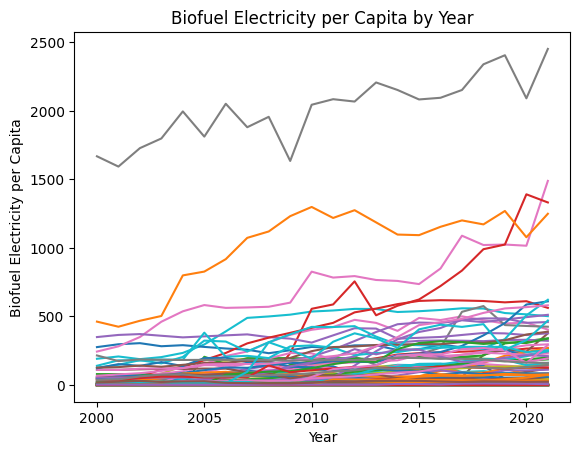

In [58]:
import matplotlib.pyplot as plt
for i in range(0, 187):
    plt.plot(selected_df.iloc[22*i:22*i+22, :]['year'], selected_df.iloc[22*i:22*i+22, :]['biofuel_elec_per_capita'])

# Add title and axis labels
plt.title('Biofuel Electricity per Capita by Year')
plt.xlabel('Year')
plt.ylabel('Biofuel Electricity per Capita')

Text(0, 0.5, 'Hydro Electricity per Capita')

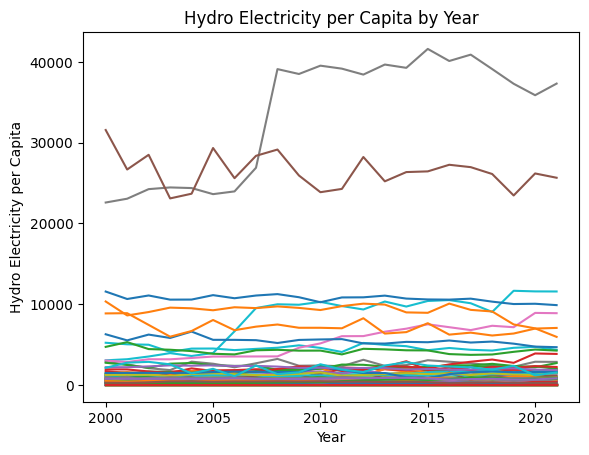

In [59]:
for i in range(0, 187):
    plt.plot(selected_df.iloc[22*i:22*i+22, :]['year'], selected_df.iloc[22*i:22*i+22, :]['hydro_elec_per_capita'])

# Add title and axis labels
plt.title('Hydro Electricity per Capita by Year')
plt.xlabel('Year')
plt.ylabel('Hydro Electricity per Capita')

Text(0, 0.5, 'net_elec_imports')

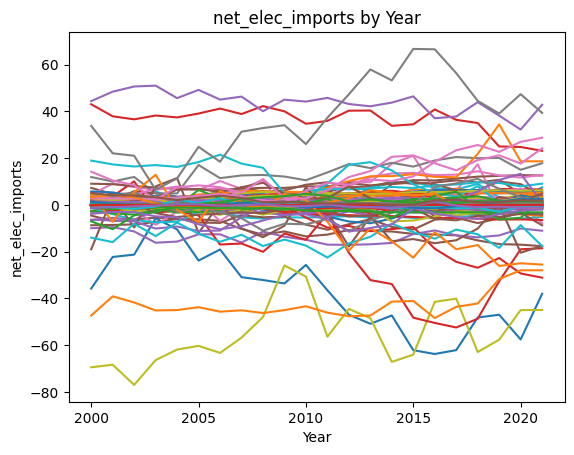

In [60]:
for i in range(0, 187):
    plt.plot(selected_df.iloc[22*i:22*i+22, :]['year'], selected_df.iloc[22*i:22*i+22, :]['net_elec_imports'])

# Add title and axis labels
plt.title('net_elec_imports by Year')
plt.xlabel('Year')
plt.ylabel('net_elec_imports')

Text(0, 0.5, 'Electricity per Capita')

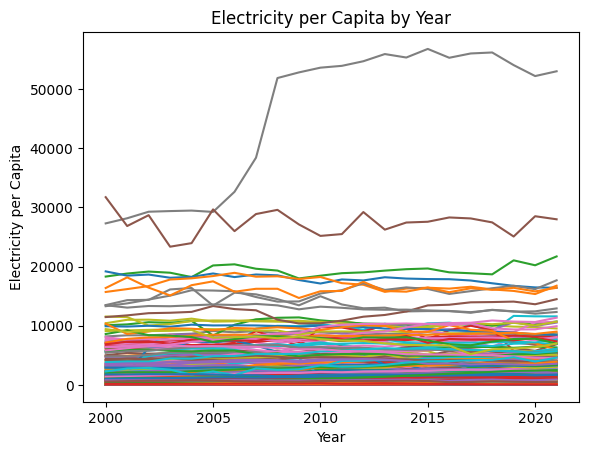

In [61]:
for i in range(0, 187):
    plt.plot(selected_df.iloc[22*i:22*i+22, :]['year'], selected_df.iloc[22*i:22*i+22, :]['per_capita_electricity'])

# Add title and axis labels
plt.title('Electricity per Capita by Year')
plt.xlabel('Year')
plt.ylabel('Electricity per Capita')

Text(0, 0.5, 'Solar Electricity per Capita')

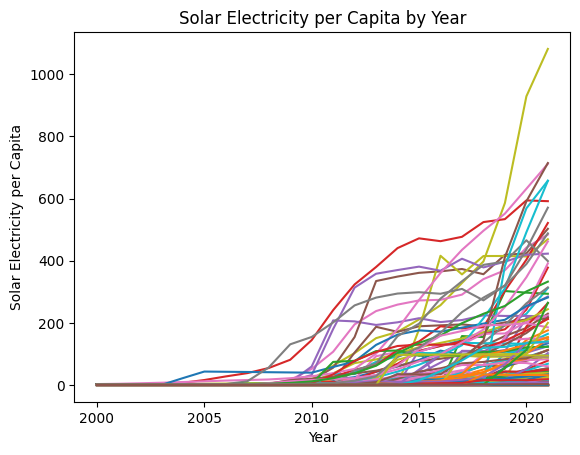

In [62]:
for i in range(0, 187):
    plt.plot(selected_df.iloc[22*i:22*i+22, :]['year'], selected_df.iloc[22*i:22*i+22, :]['solar_elec_per_capita'])

# Add title and axis labels
plt.title('Solar Electricity per Capita by Year')
plt.xlabel('Year')
plt.ylabel('Solar Electricity per Capita')

Text(0, 0.5, 'Wind Electricity per Capita')

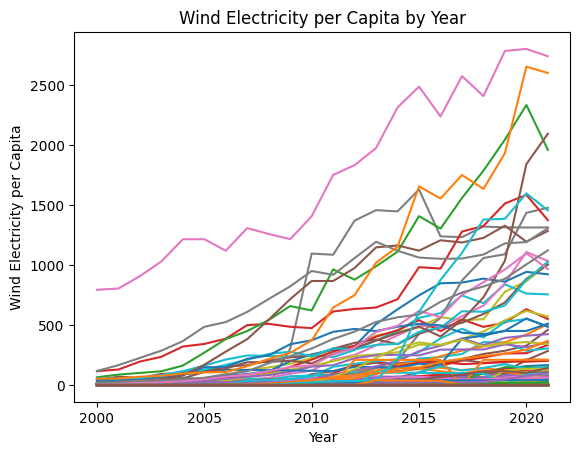

In [63]:
for i in range(0, 187):
    plt.plot(selected_df.iloc[22*i:22*i+22, :]['year'], selected_df.iloc[22*i:22*i+22, :]['wind_elec_per_capita'])

# Add title and axis labels
plt.title('Wind Electricity per Capita by Year')
plt.xlabel('Year')
plt.ylabel('Wind Electricity per Capita')

Text(0, 0.5, 'GDP_per_capita')

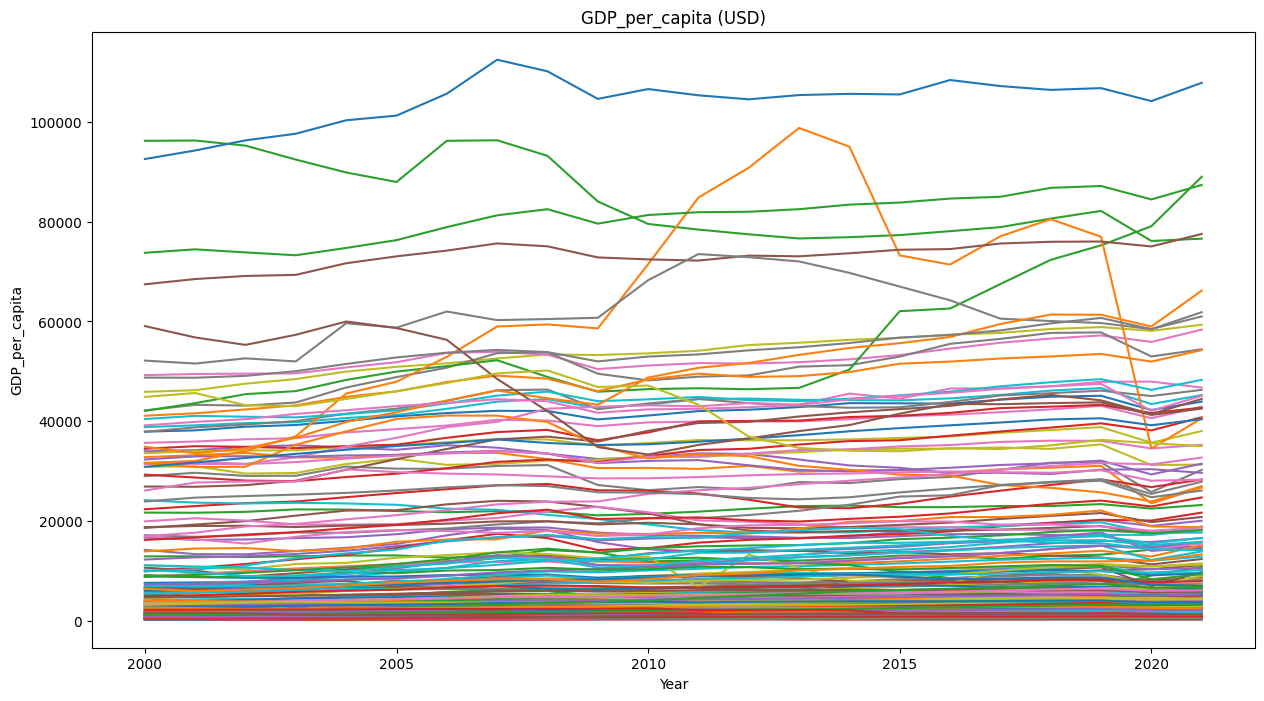

In [64]:
plt.figure(figsize=(15, 8))

for i in range(0, 187):
    plt.plot(selected_df.iloc[22*i:22*i+22, :]['year'], selected_df.iloc[22*i:22*i+22, :]['GDP_per_capita'])

# Add title and axis labels
plt.title('GDP_per_capita (USD)')
plt.xlabel('Year')
plt.ylabel('GDP_per_capita')

# Outliers

In [65]:
import seaborn as sns

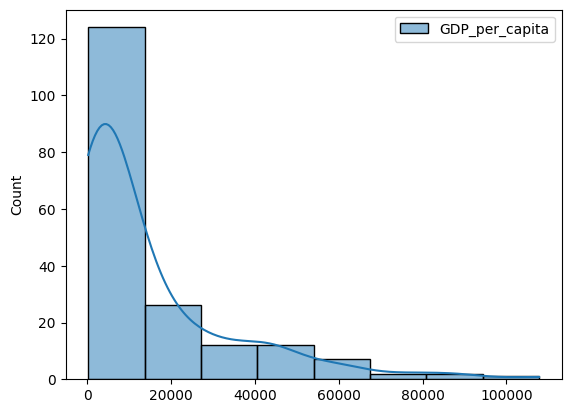

In [66]:
sns.histplot(selected_df[selected_df.year==2021][['GDP_per_capita']], bins = 8, kde=True);

In [67]:
selected_df.describe()

,year,biofuel_elec_per_capita,hydro_elec_per_capita,net_elec_imports,per_capita_electricity,solar_elec_per_capita,wind_elec_per_capita
count,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000
mean,2010.500000,64.208973,922.483266,0.024936,3674.578485,22.255359,74.606247
std,6.345064,200.593997,3461.875513,9.077529,5326.045730,75.479418,258.112399
min,2000.000000,0.000000,0.000000,-77.030000,0.000000,0.000000,0.000000
25%,2005.000000,0.000000,1.890000,-0.020000,468.270750,0.000000,0.000000
50%,2010.500000,0.277500,92.413500,0.000000,1886.690000,0.000000,0.000000
75%,2016.000000,31.467500,561.719250,0.380000,5092.284000,2.232500,10.189500
max,2021.000000,2453.043000,41622.867000,66.670000,56755.715000,1081.745000,2803.126000


In [68]:
selected_df[selected_df.year==2021][['GDP_per_capita']]

,GDP_per_capita
21,426.030015
64,3943.171983
86,14396.368558
108,2299.640572
130,14692.415621
...,...
4097,2573.307716
4119,3409.024717
4141,1303.240945
4163,1257.934757


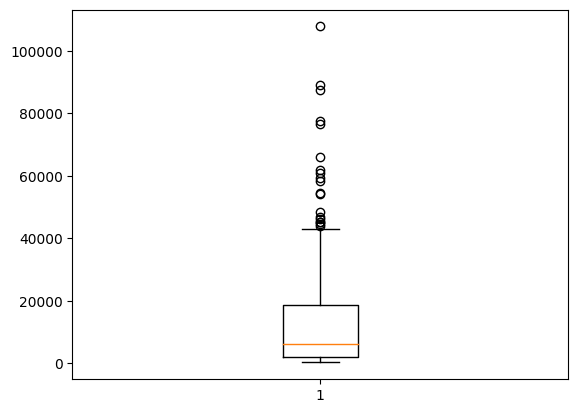

In [69]:
plt.boxplot(selected_df[selected_df.year==2021][['GDP_per_capita']]);

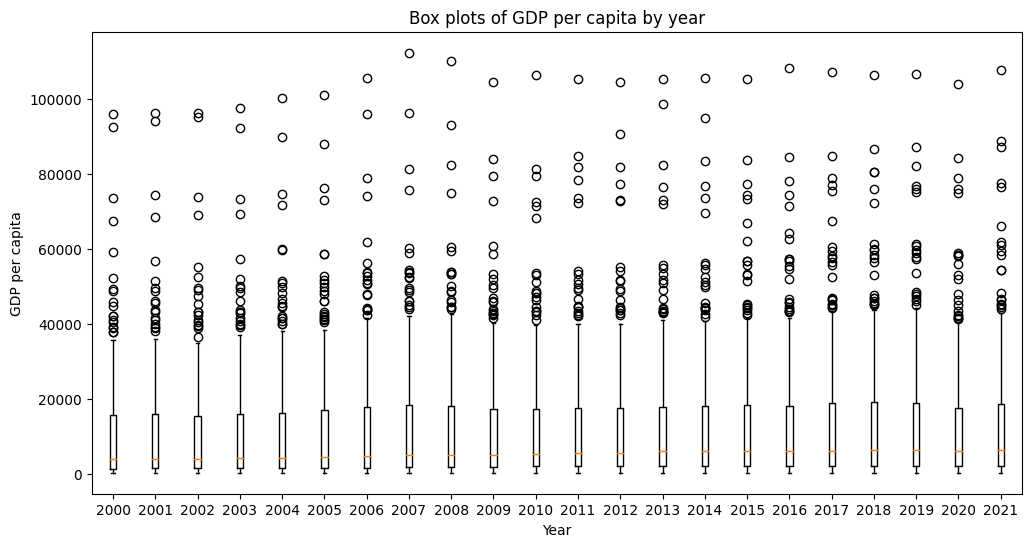

In [70]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Iterate over the years and create a box plot for each year
for year in range(2000, 2022):
    data = selected_df[selected_df['year'] == year]['GDP_per_capita']
    plt.boxplot(data, positions=[year])

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.title('Box plots of GDP per capita by year')

# Set the x-axis tick marks and labels
plt.xticks(range(2000, 2022, 1))

# Show the plot
plt.show()

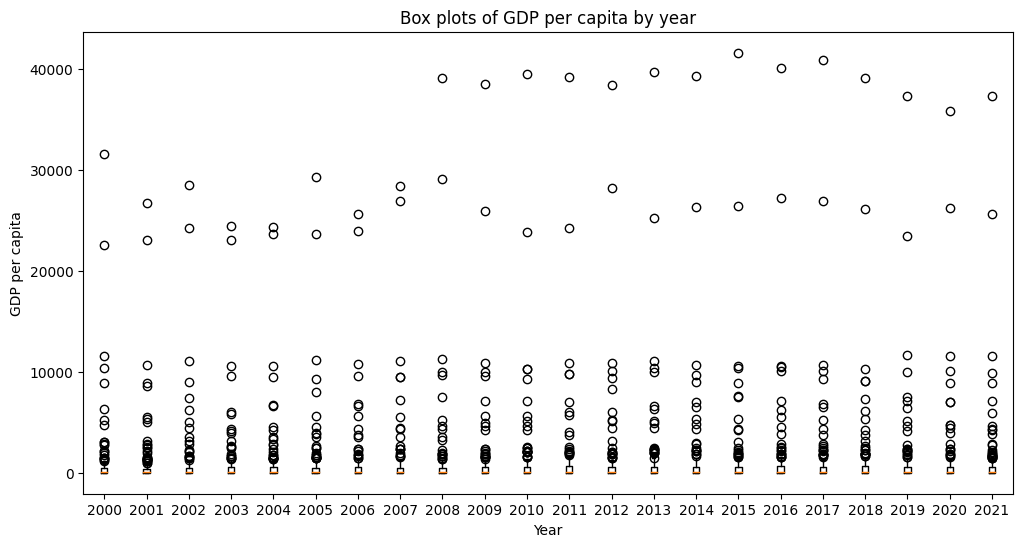

In [71]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Iterate over the years and create a box plot for each year
for year in range(2000, 2022):
    data = selected_df[selected_df['year'] == year]['hydro_elec_per_capita']
    plt.boxplot(data, positions=[year])

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.title('Box plots of GDP per capita by year')

# Set the x-axis tick marks and labels
plt.xticks(range(2000, 2022, 1))

# Show the plot
plt.show()

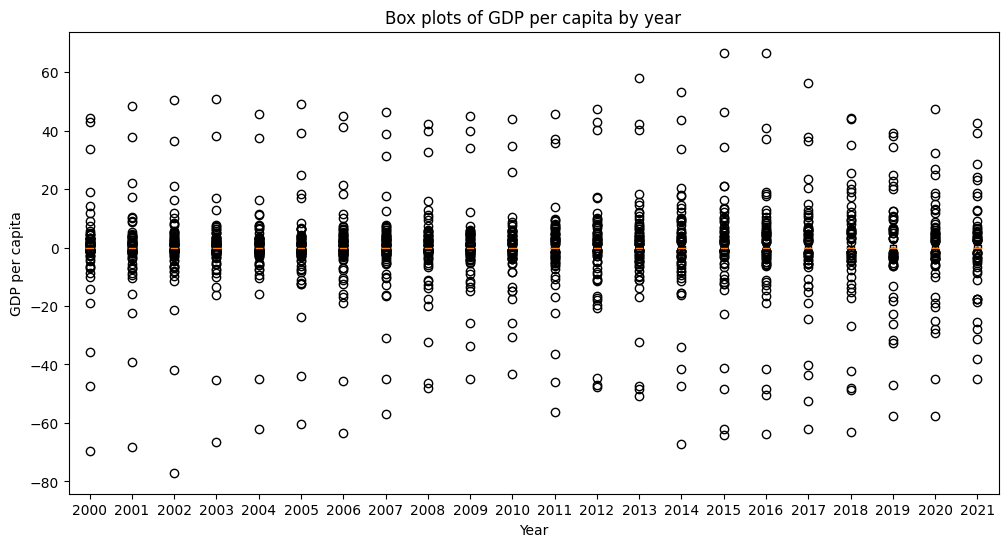

In [72]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Iterate over the years and create a box plot for each year
for year in range(2000, 2022):
    data = selected_df[selected_df['year'] == year]['net_elec_imports']
    plt.boxplot(data, positions=[year])

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.title('Box plots of GDP per capita by year')

# Set the x-axis tick marks and labels
plt.xticks(range(2000, 2022, 1))

# Show the plot
plt.show()

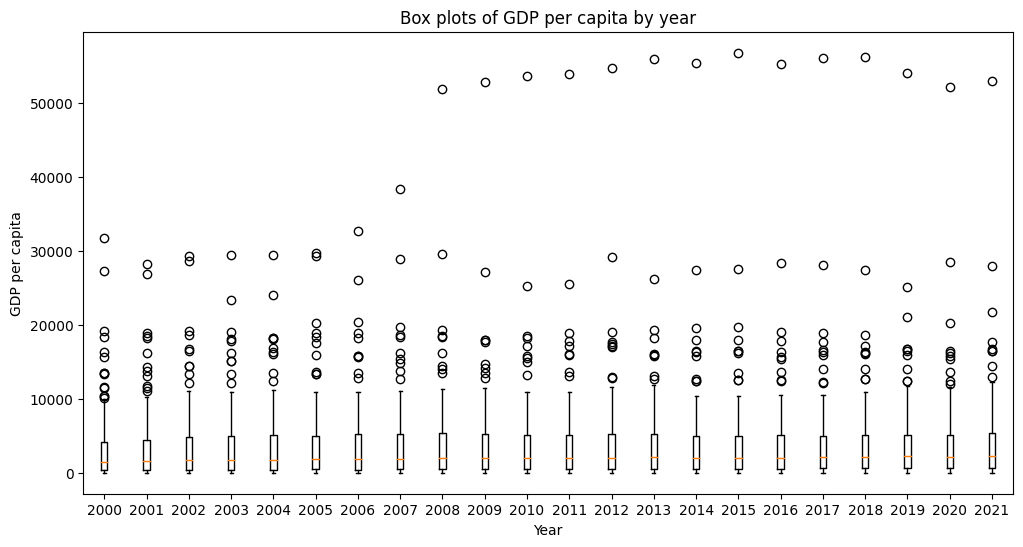

In [73]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Iterate over the years and create a box plot for each year
for year in range(2000, 2022):
    data = selected_df[selected_df['year'] == year]['per_capita_electricity']
    plt.boxplot(data, positions=[year])

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.title('Box plots of GDP per capita by year')

# Set the x-axis tick marks and labels
plt.xticks(range(2000, 2022, 1))

# Show the plot
plt.show()

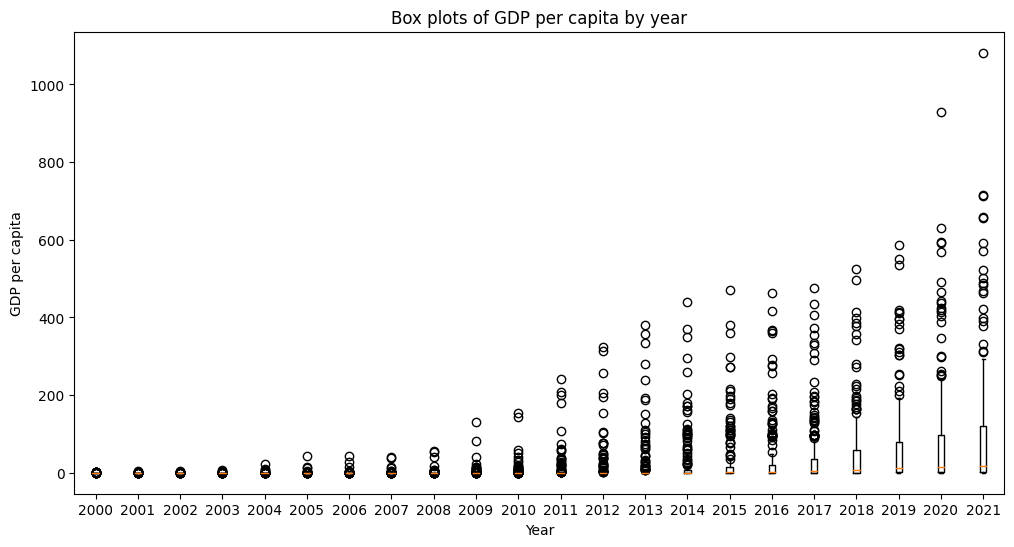

In [74]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Iterate over the years and create a box plot for each year
for year in range(2000, 2022):
    data = selected_df[selected_df['year'] == year]['solar_elec_per_capita']
    plt.boxplot(data, positions=[year])

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.title('Box plots of GDP per capita by year')

# Set the x-axis tick marks and labels
plt.xticks(range(2000, 2022, 1))

# Show the plot
plt.show()

In [75]:
selected_df = selected_df.copy()
selected_df['GDP_per_capita'] = selected_df['GDP_per_capita'].astype(float)


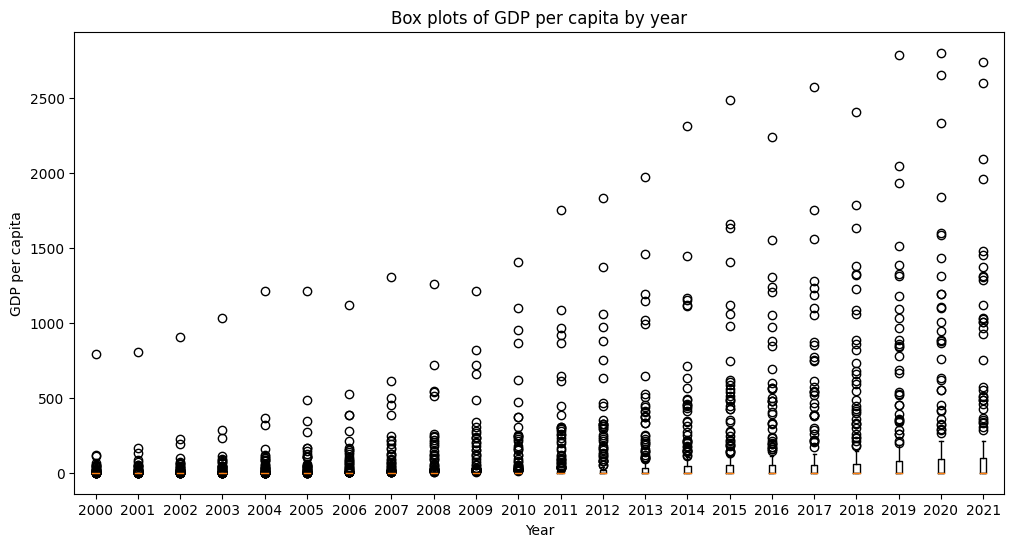

In [76]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Iterate over the years and create a box plot for each year
for year in range(2000, 2022):
    data = selected_df[selected_df['year'] == year]['wind_elec_per_capita']
    plt.boxplot(data, positions=[year])

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.title('Box plots of GDP per capita by year')

# Set the x-axis tick marks and labels
plt.xticks(range(2000, 2022, 1))

# Show the plot
plt.show()

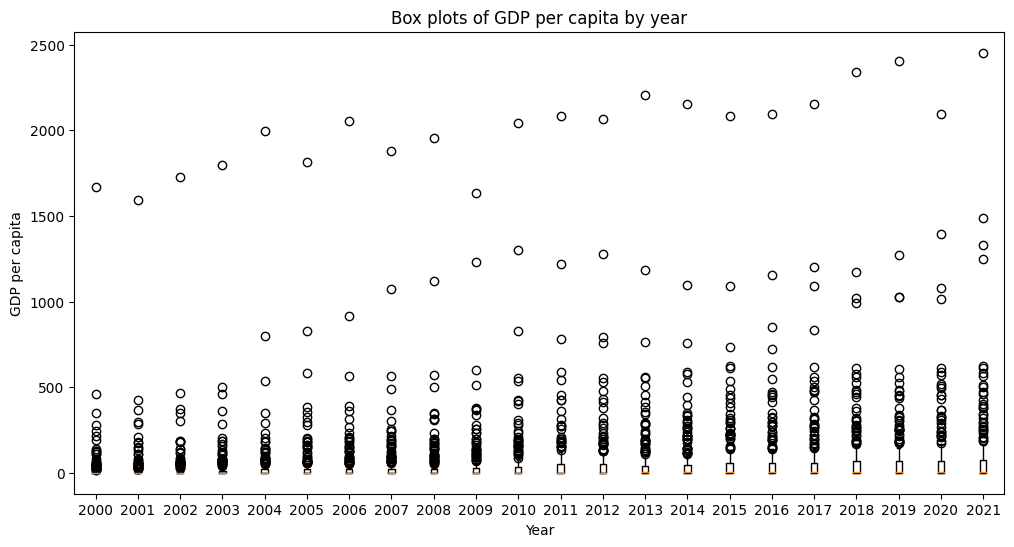

In [77]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Iterate over the years and create a box plot for each year
for year in range(2000, 2022):
    data = selected_df[selected_df['year'] == year]['biofuel_elec_per_capita']
    plt.boxplot(data, positions=[year])

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.title('Box plots of GDP per capita by year')

# Set the x-axis tick marks and labels
plt.xticks(range(2000, 2022, 1))

# Show the plot
plt.show()

In [78]:
selected_df[selected_df.year==2021].sort_values(by='GDP_per_capita').head(50)[['country', 'year', 'GDP_per_capita']]

,country,year,GDP_per_capita
639,Burundi,2021,261.019380
771,Central African Republic,2021,370.675749
2345,Malawi,2021,389.378819
21,Afghanistan,2021,426.030015
2323,Madagascar,2021,442.121604
1038,Democratic Republic of Congo,2021,501.239067
2782,Niger,2021,507.711130
2605,Mozambique,2021,573.112663
793,Chad,2021,595.663785
1635,Guinea-Bissau,2021,613.898110


In [79]:
selected_df

,country,year,biofuel_elec_per_capita,hydro_elec_per_capita,net_elec_imports,per_capita_electricity,solar_elec_per_capita,wind_elec_per_capita,GDP_per_capita
0,Afghanistan,2000,0.000,15.862,0.10,24.050,0.000,0.0,368.187174
1,Afghanistan,2001,0.000,25.395,0.10,29.967,0.000,0.0,378.391401
2,Afghanistan,2002,0.000,26.666,0.10,32.857,0.000,0.0,359.766343
3,Afghanistan,2003,0.000,27.821,0.10,41.510,0.000,0.0,363.101481
4,Afghanistan,2004,0.000,23.776,0.10,37.786,0.000,0.0,354.033913
...,...,...,...,...,...,...,...,...,...
4181,Zimbabwe,2017,21.693,269.132,2.22,498.268,0.678,0.0,1421.240770
4182,Zimbabwe,2018,25.910,335.499,1.02,610.542,1.329,0.0,1462.590280
4183,Zimbabwe,2019,24.748,271.580,1.11,536.647,1.954,0.0,1342.989587
4184,Zimbabwe,2020,22.336,243.145,1.98,485.014,1.915,0.0,1213.117058


# Pre-processing the features

## Splitting the *base* dataset into training and testing

In [80]:
from sklearn.model_selection import train_test_split

In [100]:
# Creates X and y for base dataset (JUST USE THIS IF WE ARE SEPPARATING X FROM Y)
# X_base = full_cleaned_df_base[['biofuel_electricity', 'hydro_electricity', 'solar_electricity', 'wind_electricity']]
# y_base = full_cleaned_df_base['GDP_per_capita']


# It was full_cleaned_df_base, I have changed to selected_df to apply the changes.

selected_df.head(3)

,country,year,biofuel_elec_per_capita,hydro_elec_per_capita,net_elec_imports,per_capita_electricity,solar_elec_per_capita,wind_elec_per_capita,GDP_per_capita
0,Afghanistan,2000,0.0001,15.862,0.1,24.050,0.0001,0.0001,368.187174
1,Afghanistan,2001,0.0001,25.395,0.1,29.967,0.0001,0.0001,378.391401
2,Afghanistan,2002,0.0001,26.666,0.1,32.857,0.0001,0.0001,359.766343


In [113]:
# Split base X and y into training and testing datasets (JUST USE THIS IF WE ARE SEPPARATING X FROM Y)
# X_base_train, X_base_test, y_base_train, y_base_test = train_test_split(X_base, y_base, test_size=0.2, random_state=0)

# Split full base into training and testing datasets

# Changed here as well
 
full_cleaned_df_base_train, full_cleaned_df_base_test = train_test_split(selected_df, test_size=0.2, random_state=0)

## Scaling *base* dataset

In [114]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.compose import ColumnTransformer

In [115]:
# # Step 0 - Instanciate Standard Scaler (JUST USE THIS IF WE ARE SEPPARATING X FROM Y)
# mm_scaler_base = MinMaxScaler()

# # Step 1- Fit the scaler to the features
# mm_scaler_base.fit(X_base_train)

# # 2-Scale/Transform; <-> apply the transformation and store it in a df
# X_base_train_scaled = pd.DataFrame(mm_scaler_base.transform(X_base_train), columns=X_base_train.columns)

In [116]:
# Creating Pipeline for scaling only the features, passing through the target and the reference columns country/year

columns_to_scale = ['net_elec_imports', 
                    'per_capita_electricity',
                    'biofuel_elec_per_capita',
                    'hydro_elec_per_capita',
                    'solar_elec_per_capita',
                    'wind_elec_per_capita']

ct_base = ColumnTransformer([
                ("scale", MinMaxScaler(), columns_to_scale)],
                remainder = "passthrough"
)

In [117]:
# Fit and transforming the scaling on base dataset

full_cleaned_df_base_train_scaled = pd.DataFrame(ct_base.fit_transform(full_cleaned_df_base_train),
            columns=ct_base.get_feature_names_out())

In [107]:
full_cleaned_df_base_train_scaled.head(3)

,scale__net_elec_imports,scale__per_capita_electricity,scale__biofuel_elec_per_capita,scale__hydro_elec_per_capita,scale__solar_elec_per_capita,scale__wind_elec_per_capita,remainder__country,remainder__year,remainder__GDP_per_capita
0,0.536682,0.022208,0.0,0.0,0.054969,0.0,Maldives,2019,10753.143171
1,0.679022,0.214619,0.877757,0.064423,0.008391,0.31274,Finland,2017,45173.629407
2,0.472793,0.074484,0.002465,0.00526,0.0,0.000388,Ukraine,2007,2528.081055


## In *final* dataset, replacing Zeros in features, by 0.0001

In [118]:
# Checking the minimum value of energy prduction we currently have
min_value = selected_df[['biofuel_elec_per_capita',
                         'hydro_elec_per_capita', 
                         'solar_elec_per_capita',
                         'wind_elec_per_capita']][full_cleaned_df_final[['biofuel_elec_per_capita',
                                                                         'hydro_elec_per_capita', 
                                                                         'solar_elec_per_capita',
                                                                         'wind_elec_per_capita']] != 0].min().min()

In [119]:
min_value

0.009

In [120]:
# Replacing Zeros by 0.0001
selected_df[['biofuel_elec_per_capita',
             'hydro_elec_per_capita', 
             'solar_elec_per_capita',
             'wind_elec_per_capita']] = full_cleaned_df_final[['biofuel_elec_per_capita',
                                                               'hydro_elec_per_capita', 
                                                               'solar_elec_per_capita',
                                                               'wind_elec_per_capita']].replace(0, 0.0001)

In [121]:
(selected_df == 0).sum()

country                       0
year                          0
biofuel_elec_per_capita       0
hydro_elec_per_capita         0
net_elec_imports           1592
per_capita_electricity        1
solar_elec_per_capita         0
wind_elec_per_capita          0
GDP_per_capita                0
dtype: int64

## Splitting the *final* dataset into training and testing

In [123]:
# Creates X and y for final dataset (JUST USE THIS IF WE ARE SEPPARATING X FROM Y)
# X_final = full_cleaned_df_final[['biofuel_electricity', 'hydro_electricity', 'other_renewable_exc_biofuel_electricity', 'solar_electricity', 'wind_electricity']]
# y_final = full_cleaned_df_final['GDP_per_capita']

selected_df.head(3)

,country,year,biofuel_elec_per_capita,hydro_elec_per_capita,net_elec_imports,per_capita_electricity,solar_elec_per_capita,wind_elec_per_capita,GDP_per_capita
0,Afghanistan,2000,0.0001,15.862,0.1,24.050,0.0001,0.0001,368.187174
1,Afghanistan,2001,0.0001,25.395,0.1,29.967,0.0001,0.0001,378.391401
2,Afghanistan,2002,0.0001,26.666,0.1,32.857,0.0001,0.0001,359.766343


In [124]:
# Split final X and y into training and testing datasets (JUST USE THIS IF WE ARE SEPPARATING X FROM Y)
# X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X_final, y_final, test_size=0.2, random_state=0)

# Split full final into training and testing datasets
selected_df_train, selected_df_test = train_test_split(selected_df, test_size=0.3, random_state=0)

## Scaling *final* dataset

In [125]:
# # Step 0 - Instanciate Standard Scaler (JUST USE THIS IF WE ARE SEPPARATING X FROM Y)
# mm_scaler_final = MinMaxScaler()

# # Step 1- Fit the scaler to the features
# mm_scaler_final.fit(X_final_train)

# # 2-Scale/Transform; <-> apply the transformation and store it in a df
# X_final_train_scaled = pd.DataFrame(mm_scaler_final.transform(X_final_train), columns=X_final_train.columns)

In [126]:
# Creating Pipeline for scaling only the features, passing through the target and the reference columns country/year

columns_to_scale = ['net_elec_imports',
                    'per_capita_electricity',
                    'biofuel_elec_per_capita',
                    'hydro_elec_per_capita', 
                    'solar_elec_per_capita',
                    'wind_elec_per_capita']
ct_final = ColumnTransformer([
                ("scale", MinMaxScaler(), columns_to_scale)],
                remainder = "passthrough"
)

In [137]:
# Fit and transforming the scaling on final train dataset

selected_df_train_scaled = pd.DataFrame(ct_final.fit_transform(selected_df_train),
            columns=ct_final.get_feature_names_out())
selected_df_train_scaled.head()

,scale__net_elec_imports,scale__per_capita_electricity,scale__biofuel_elec_per_capita,scale__hydro_elec_per_capita,scale__solar_elec_per_capita,scale__wind_elec_per_capita,remainder__country,remainder__year,remainder__GDP_per_capita
0,0.536682,0.001896,0.0,0.0,0.0,0.0,Comoros,2018,1383.377789
1,0.536682,0.01169,0.004495,0.003792,0.0,0.0,Congo,2020,1586.318297
2,0.536682,0.147047,0.00319,0.001794,0.001342,0.002828,South Korea,2007,23360.905735
3,0.537588,0.002427,0.0,0.00039,0.0,0.0,Mauritania,2006,1601.141206
4,0.538703,0.004056,0.0,0.005729,0.0,0.0,Lesotho,2012,1075.620196


In [138]:
# Transforming the scaling on final test dataset

selected_df_test_scaled = pd.DataFrame(ct_final.transform(selected_df_test),
            columns=ct_final.get_feature_names_out())
selected_df_test_test.head()

,scale__net_elec_imports,scale__per_capita_electricity,scale__biofuel_elec_per_capita,scale__hydro_elec_per_capita,scale__solar_elec_per_capita,scale__wind_elec_per_capita,remainder__country,remainder__year,remainder__GDP_per_capita
0,0.536682,0.013094,0.005101,0.005517,0.022927,0.006098,Sri Lanka,2021,4375.947708
1,0.489793,0.058209,0.01116,0.020071,0.09195,0.127282,Romania,2015,8976.880535
2,0.543022,0.054325,0.001958,0.016953,0.0,0.022837,Turkey,2011,9207.542363
3,0.536682,0.007243,0.0,0.001119,0.0,0.0,Sao Tome and Principe,2019,1676.396313
4,0.531945,0.038781,0.000504,0.016332,0.0,0.000318,Turkey,2004,7112.514571


In [139]:
full_cleaned_final = selected_df_train_scaled.sort_values('remainder__year', ascending=True)

In [140]:
full_cleaned_final

,scale__net_elec_imports,scale__per_capita_electricity,scale__biofuel_elec_per_capita,scale__hydro_elec_per_capita,scale__solar_elec_per_capita,scale__wind_elec_per_capita,remainder__country,remainder__year,remainder__GDP_per_capita
1941,0.536682,0.005778,0.0,0.004425,0.0,0.0,Vietnam,2000,1183.854097
1404,0.845677,0.083112,0.010424,0.018641,0.000324,0.003528,Italy,2000,32350.904367
2426,0.536682,0.001575,0.001624,0.001069,0.0,0.0,Sudan,2000,1906.391357
709,0.536682,0.001882,0.0,0.000175,0.0,0.0,Bangladesh,2000,646.038113
1657,0.533408,0.030189,0.0,0.033932,0.0,0.016234,Costa Rica,2000,7646.026942
...,...,...,...,...,...,...,...,...,...
2748,0.536682,0.107419,0.0,0.0,0.607688,0.033702,Seychelles,2021,16639.682186
511,0.540235,0.011289,0.002806,0.004049,0.005033,0.004467,Pakistan,2021,1473.8649
505,0.536682,0.123084,0.0,0.0,0.184701,0.0,United States Virgin Islands,2021,35022.466403
2743,0.481781,0.150145,0.172561,0.000869,0.447431,0.370888,Belgium,2021,42901.43206


In [154]:
# SAVING FULL dataset (no splitting) to CSV 

full_cleaned_final.to_csv('full_cleaned_final.csv')

In [155]:
# SORTING by year the FULL BASE dataset (no splitting) 
# and SAVING it to CSV

full_cleaned_base = full_cleaned_df_base_train_scaled.sort_values('remainder__year', ascending=True)
full_cleaned_base.to_csv('full_cleaned_base.csv')

In [158]:
# SAVING the TRAIN dataset

selected_df_train_scaled.to_csv('full_cleaned_final_train.csv')

In [159]:
# SAVING the TEST dataset

selected_df_test_scaled.to_csv('full_cleaned_final_test.csv')